In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('placement.csv')

In [5]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


C:\Users\12368\AppData\Local\Temp\ipykernel_2632\1258807651.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
C:\Users\12368\AppData\Local\Temp\ipykernel_2632\1258807651.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


Text(0.5, 1.0, 'BoxPlot for placement_exam_marks')

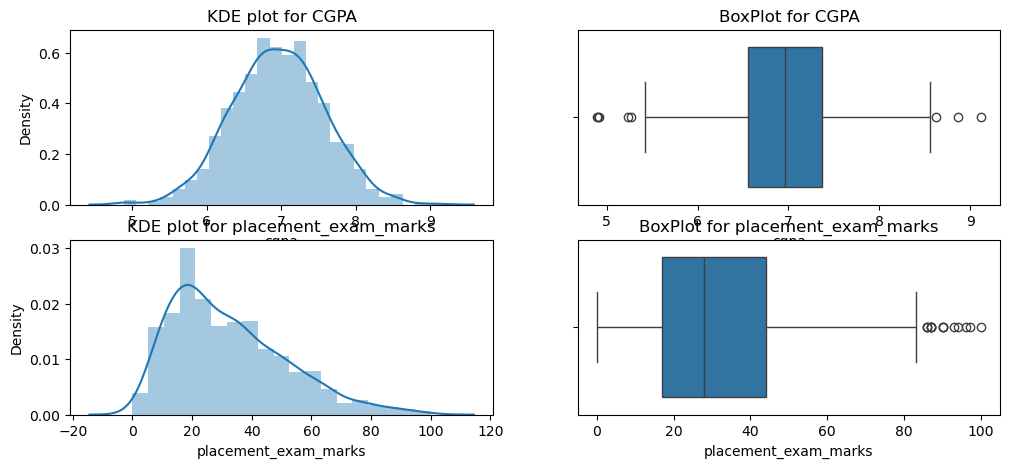

In [19]:
plt.figure(figsize=(12, 5))

## plot for cgpa
plt.subplot(2, 2, 1)
sns.distplot(df['cgpa'])
plt.title("KDE plot for CGPA")
plt.subplot(2, 2, 2)
plt.title("BoxPlot for CGPA")
sns.boxplot(df['cgpa'], orient='h')


# plot for placement_exam_marks
plt.subplot(2, 2, 3)
plt.title("KDE plot for placement_exam_marks")
sns.distplot(df['placement_exam_marks'])
plt.subplot(2, 2, 4)
sns.boxplot(df['placement_exam_marks'], orient='h')
plt.title("BoxPlot for placement_exam_marks")


#### To handle skewed distributions, IQR is generally preferred. For the normal distribution, z-score is the choosen.

In [22]:
df['cgpa'].skew()

-0.014529938929314918

In [24]:
df['placement_exam_marks'].skew()

0.8356419499466834

skew() > 0. Long right tail i.e, left-skewed. skew() < 0. Long left tail i.e, right-skewed.

#### Detecting outliers
Since this is a left skewed distribution, we can detect outliers using IQR

In [31]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

In [33]:
q1 = df['placement_exam_marks'].quantile(0.25)
q3 = df['placement_exam_marks'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

In [35]:
lower_bound, upper_bound

(-23.5, 84.5)

Since our dataset has a minimum value of 0 so we do not have any outliers on our lower limit

In [40]:
outliers = df[df['placement_exam_marks'] > upper_bound]
len(outliers)

15

There are 15 values that lies above our maximum value i.e, outliers.

#### Handling Outliers

##### 1. Trimmimg

In [45]:
new_df = df[df['placement_exam_marks'] < upper_bound ]

In [47]:
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


##### 2. Capping

In [52]:
updated_df = df.copy()
updated_df['updated_placement_exam_marks'] = np.where(
    df['placement_exam_marks'] > upper_bound,
    upper_bound,
    df['placement_exam_marks']
)

In [54]:
updated_df

,cgpa,placement_exam_marks,placed,updated_placement_exam_marks
0,7.19,26.0,1,26.0
1,7.46,38.0,1,38.0
2,7.54,40.0,1,40.0
3,6.42,8.0,1,8.0
4,7.23,17.0,0,17.0
...,...,...,...,...
995,8.87,44.0,1,44.0
996,9.12,65.0,1,65.0
997,4.89,34.0,0,34.0
998,8.62,46.0,1,46.0
